# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from datetime import datetime 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
# deprecated -- statsmodels.tsa.arima_model.ARIMA 
# should use -- statsmodels.tsa.arima.model.ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from datetime import timedelta
from time import time


C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# 2 Preparing dataframe

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EA54-6392

 Directory of C:\Users\Krop\Documents\Ironhack\IronPau\week8\project

03/06/2022  18:05    <DIR>          .
03/06/2022  18:05    <DIR>          ..
03/06/2022  14:42    <DIR>          .ipynb_checkpoints
30/05/2022  18:10    <DIR>          Bacardi
30/05/2022  15:17       440,848,929 Bacardi-20220530T131548Z-001.zip
02/06/2022  11:48            82,805 first-look-w8d1.ipynb
03/06/2022  12:03           667,112 First-models.ipynb
03/06/2022  14:42           501,988 First-models-v2.ipynb
03/06/2022  18:05           843,838 First-models-v3.ipynb
02/06/2022  10:25           588,238 time_series_example_class-Copy1.ipynb
               6 File(s)    443,532,910 bytes
               4 Dir(s)  759,924,502,528 bytes free


In [3]:
cd bacardi\Files

C:\Users\Krop\Documents\Ironhack\IronPau\week8\project\bacardi\Files


In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EA54-6392

 Directory of C:\Users\Krop\Documents\Ironhack\IronPau\week8\project\bacardi\Files

02/06/2022  19:39    <DIR>          .
02/06/2022  19:39    <DIR>          ..
03/05/2022  07:29        71,965,842 Digital_Commerce_Market Share US_UEBig5.xlsx
03/05/2022  06:54        10,276,231 Digital_Commerce_Pure Players_US_UEbig5.xlsb
09/05/2022  00:46        37,760,083 Digital_Commerce_RetailersCom_US_UEBig5.xlsx
01/06/2022  09:26        11,763,614 Market_share_clean_v2.xlsx
02/06/2022  10:31         3,267,508 pureRetailersCleanv1.csv
03/06/2022  14:55             3,348 pureRetailersDuplicates.csv
               6 File(s)    135,036,626 bytes
               2 Dir(s)  759,924,502,528 bytes free


In [5]:
#we are interested on the dataframe [3]
dfpurep = pd.read_excel('Digital_Commerce_Pure Players_US_UEbig5.xlsb', sheet_name=3, engine='pyxlsb')

In [6]:
dfpurep.info() #inspect the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87244 entries, 0 to 87243
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Budget Type         87244 non-null  object 
 1   Fiscal Year         87244 non-null  object 
 2   Month               87244 non-null  int64  
 3   Customer Name       87244 non-null  object 
 4   Customer Group 1    87244 non-null  object 
 5   Customer Group 2    87244 non-null  object 
 6   Financial Category  87244 non-null  object 
 7   Category            87244 non-null  object 
 8   Brand               87244 non-null  object 
 9   Brandline           87244 non-null  object 
 10  Format              87243 non-null  float64
 11  Classification      87244 non-null  object 
 12  Geography           87244 non-null  object 
 13  Region              87244 non-null  object 
 14  Agency Toggle       87244 non-null  object 
 15  IPC Value           87244 non-null  int64  
 16  Mark

In [7]:
dfpurep.columns

Index(['Budget Type', 'Fiscal Year', 'Month', 'Customer Name',
       'Customer Group 1', 'Customer Group 2', 'Financial Category',
       'Category', 'Brand', 'Brandline', 'Format', 'Classification',
       'Geography', 'Region', 'Agency Toggle', 'IPC Value', 'Market',
       '4 Digit Code', 'Currency', 'Vol 9LC', 'Manufacturer', 'DataInd',
       'DataSource'],
      dtype='object')

In [8]:
#look for duplicates
dfpurep.duplicated().sum()

8

In [9]:
#look how are this duplicates
dfduplicates=dfpurep[dfpurep.duplicated(keep=False)]
dfduplicates

,Budget Type,Fiscal Year,Month,Customer Name,Customer Group 1,Customer Group 2,Financial Category,Category,Brand,Brandline,...,Region,Agency Toggle,IPC Value,Market,4 Digit Code,Currency,Vol 9LC,Manufacturer,DataInd,DataSource
37261,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009675,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
37262,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009675,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
37263,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870010113,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
37264,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870010113,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
37265,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009671,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
37266,ACTUAL,FY22,44348,Tastillery GmbH,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009671,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
41191,ACTUAL,FY22,44440,YOPOGOELHIELO,YOPOGOELHIELO,YOPOGOELHIELO,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870002859,ES,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
41192,ACTUAL,FY22,44440,YOPOGOELHIELO,YOPOGOELHIELO,YOPOGOELHIELO,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870002859,ES,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
44703,ACTUAL,FY22,44531,Knuspr.de,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009671,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe
44704,ACTUAL,FY22,44531,Knuspr.de,Other DE,Other DE,RUM,RUM,BACARDI,BACARDI OAKHEART ORIGINAL,...,EUROPE,N,4870009671,DE,4870,EUR,0.0,BACARDI,Sell In,NSV Europe


In [10]:
dfduplicates.to_csv('pureRetailersDuplicates.csv')

In [11]:
#drop the duplicates
dfpurep = dfpurep.drop_duplicates()
dfpurep.duplicated().sum()

0

In [12]:
#reset the index
dfpurep.reset_index(drop=True, inplace=True)

In [13]:
#we select only the columns we are interested in
data1=dfpurep[['Fiscal Year', 'Month','Category', 'Geography', 'Vol 9LC']]

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87236 entries, 0 to 87235
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fiscal Year  87236 non-null  object 
 1   Month        87236 non-null  int64  
 2   Category     87236 non-null  object 
 3   Geography    87236 non-null  object 
 4   Vol 9LC      84068 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [15]:
#selecting only germany rum data
dfGRum=data1.loc[(data1['Geography'] == 'Germany') & (data1['Category'] == 'RUM')]

In [16]:
dfGRum

,Fiscal Year,Month,Category,Geography,Vol 9LC
24288,FY20,43556,RUM,Germany,NaN
24289,FY20,43556,RUM,Germany,6.666667
24290,FY20,43556,RUM,Germany,0.466667
24291,FY20,43556,RUM,Germany,2.000000
24292,FY20,43556,RUM,Germany,21.000000
...,...,...,...,...,...
87186,FY21,44256,RUM,Germany,2.000000
87187,FY21,44256,RUM,Germany,0.000000
87188,FY21,44256,RUM,Germany,1.400000
87189,FY21,44256,RUM,Germany,0.466667


In [17]:
#check the nulls for each column
print(dfGRum['Fiscal Year'].isnull().values.any())
print(dfGRum['Month'].isnull().values.any())
print(dfGRum['Vol 9LC'].isnull().values.any())


False
False
True


In [18]:
#drop the nulls 
dfGRum.dropna(subset=['Vol 9LC'], inplace = True)

C:\Users\Krop\AppData\Local\Temp/ipykernel_21120/1903365417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGRum.dropna(subset=['Vol 9LC'], inplace = True)


In [19]:
#check to be sure
print(dfGRum['Vol 9LC'].isnull().values.any())

False


In [20]:
#reset index
dfGRum.reset_index(drop=True, inplace=True)

In [21]:
#we use a hnady function to convert the months into date
def convert_int_date(ordinal_date):
    date_time = datetime.fromordinal(
        datetime(1900, 1, 1).toordinal() + ordinal_date - 2
    )
    return date_time

In [22]:
#we apply the function in the column
dfGRum["Month"] = dfGRum["Month"].astype(int).apply(convert_int_date)

C:\Users\Krop\AppData\Local\Temp/ipykernel_21120/674866573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGRum["Month"] = dfGRum["Month"].astype(int).apply(convert_int_date)


In [23]:
dfGRum

,Fiscal Year,Month,Category,Geography,Vol 9LC
0,FY20,2019-04-01,RUM,Germany,6.666667
1,FY20,2019-04-01,RUM,Germany,0.466667
2,FY20,2019-04-01,RUM,Germany,2.000000
3,FY20,2019-04-01,RUM,Germany,21.000000
4,FY20,2019-04-01,RUM,Germany,7.000000
...,...,...,...,...,...
4807,FY21,2021-03-01,RUM,Germany,2.000000
4808,FY21,2021-03-01,RUM,Germany,0.000000
4809,FY21,2021-03-01,RUM,Germany,1.400000
4810,FY21,2021-03-01,RUM,Germany,0.466667


In [24]:
dfGRum.rename(columns={'Fiscal Year': 'Fiscal_Year',
                   'Vol 9LC': 'Vol_9LC'},
          inplace=True, errors='raise')

C:\Users\Krop\AppData\Local\Temp/ipykernel_21120/4043047071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGRum.rename(columns={'Fiscal Year': 'Fiscal_Year',


In [25]:
dfGRum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fiscal_Year  4812 non-null   object        
 1   Month        4812 non-null   datetime64[ns]
 2   Category     4812 non-null   object        
 3   Geography    4812 non-null   object        
 4   Vol_9LC      4812 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 188.1+ KB


### on the idea of groupby month


In [26]:
dfGRum=dfGRum.reset_index(drop=True)

In [27]:
dfGRum

,Fiscal_Year,Month,Category,Geography,Vol_9LC
0,FY20,2019-04-01,RUM,Germany,6.666667
1,FY20,2019-04-01,RUM,Germany,0.466667
2,FY20,2019-04-01,RUM,Germany,2.000000
3,FY20,2019-04-01,RUM,Germany,21.000000
4,FY20,2019-04-01,RUM,Germany,7.000000
...,...,...,...,...,...
4807,FY21,2021-03-01,RUM,Germany,2.000000
4808,FY21,2021-03-01,RUM,Germany,0.000000
4809,FY21,2021-03-01,RUM,Germany,1.400000
4810,FY21,2021-03-01,RUM,Germany,0.466667


In [28]:
#we should think about the negative values that we saw in the excel
print(dfGRum['Vol_9LC'].unique())

[ 6.66666700e+00  4.66667000e-01  2.00000000e+00  2.10000000e+01
  7.00000000e+00  5.13333300e+00  1.40000000e+00  1.00000000e+01
  5.30000000e+01  1.10000000e+01  2.33333000e-01  9.33333000e-01
  2.80000000e+00  6.53333300e+00  1.33333300e+00  2.66666700e+00
  6.66667000e-01  2.33333300e+00  4.66666700e+00  1.86666700e+00
  4.00000000e+00  3.26666700e+00  6.90000000e+01  5.60000000e+00
  1.90000000e+01  2.23333330e+01 -2.33333000e-01  3.33333300e+00
  1.00000000e+00  1.91333330e+01  1.06000000e+02  1.16666670e+01
  3.03333300e+00  6.00000000e+00  2.20000000e+01  3.64000000e+01
  3.73333300e+00  4.10000000e+01  7.93333300e+00  1.53333330e+01
  2.50000000e+01  1.06666670e+01  1.77333330e+01  2.52000000e+01
  3.33333000e-01  5.33333300e+00  9.90000000e+01  1.80000000e+01
  6.22067000e-01  7.79330000e-02  7.77000000e-02  1.66666700e+00
  2.40000000e+01  1.63333300e+00  1.50000000e+01  2.89333330e+01
  3.03333330e+01  3.33333330e+01  1.26000000e+01  2.80000000e+01
  1.09000000e+02  6.34666

In [29]:
dfGRum.groupby(['Month']).sum()

,Vol_9LC
Month,
2019-04-01,165.266668
2019-05-01,176.966667
2019-06-01,243.366666
2019-07-01,207.199999
2019-08-01,200.466439
2019-09-01,142.555631
2019-10-01,561.977931
2019-11-01,356.088971
2019-12-01,487.277701


In [30]:
hist_dfGRum=dfGRum.groupby(['Month']).sum()

In [31]:
hist_dfGRum

,Vol_9LC
Month,
2019-04-01,165.266668
2019-05-01,176.966667
2019-06-01,243.366666
2019-07-01,207.199999
2019-08-01,200.466439
2019-09-01,142.555631
2019-10-01,561.977931
2019-11-01,356.088971
2019-12-01,487.277701


In [32]:
#we could reset the name of the index if we wanted to with the next comand

# df = df.rename_axis(None, axis = 1)

In [33]:
#consider scaling the data to get better models as we have data that is not stationary

## 2.2 Visualization

In [34]:
#set seaborn
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('whitegrid')

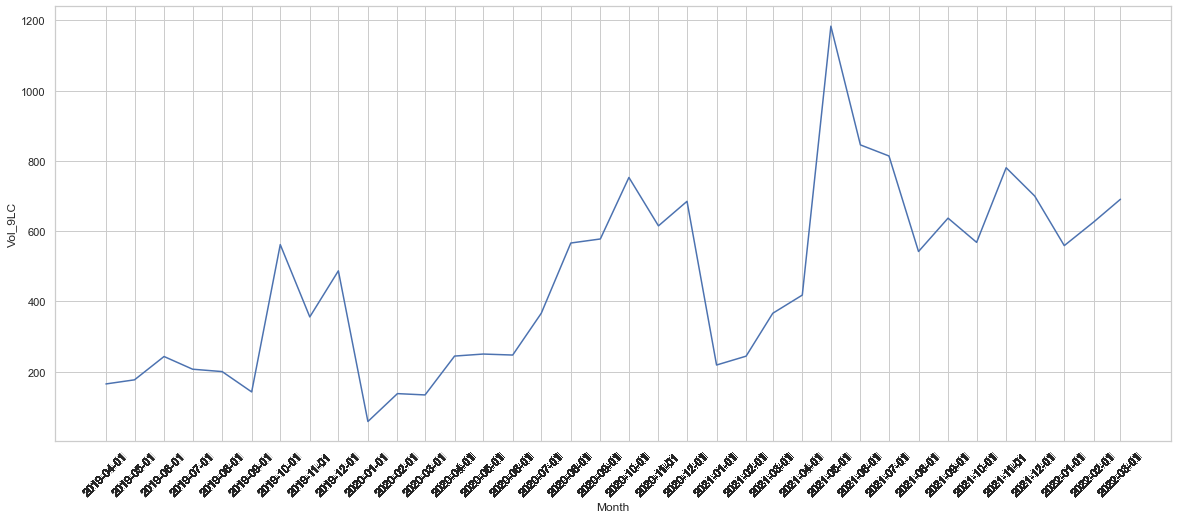

In [35]:
#first plot
ax=sns.lineplot(x='Month',y='Vol_9LC',data=hist_dfGRum)
plt.xticks(dfGRum['Month'])
ax.tick_params(axis='x',rotation=45);

#  3 Data preprocessing for time-series forecasting

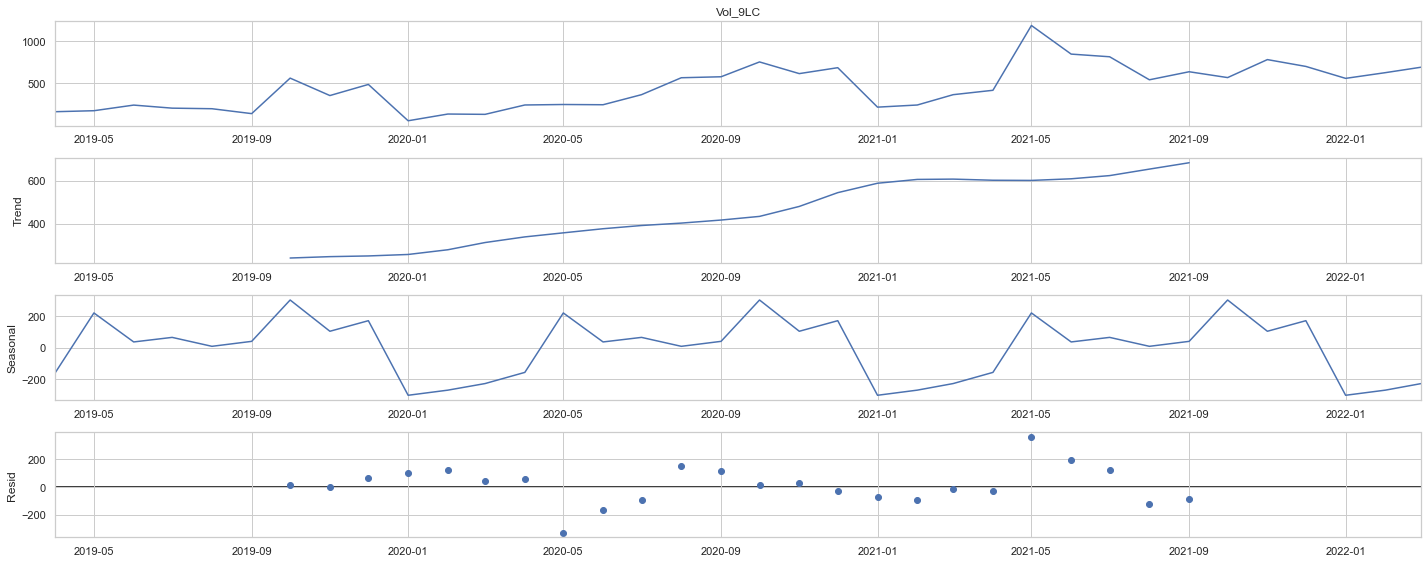

In [36]:
# decomposition plot

decomp=seasonal_decompose(hist_dfGRum['Vol_9LC'])
decomp.plot()
plt.show();

<AxesSubplot:xlabel='Month'>

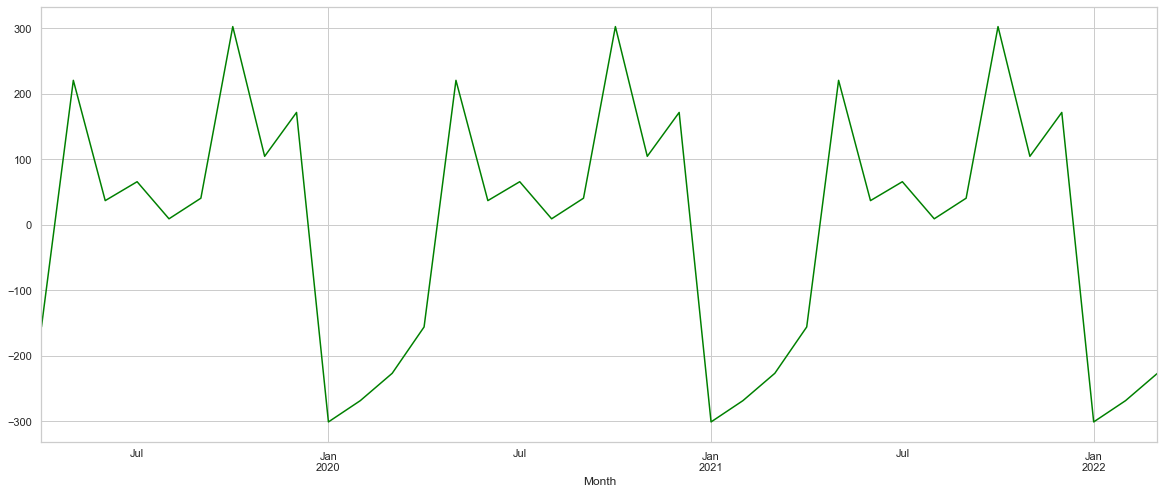

In [37]:
seasonality=decomp.seasonal
seasonality.plot(color='green')

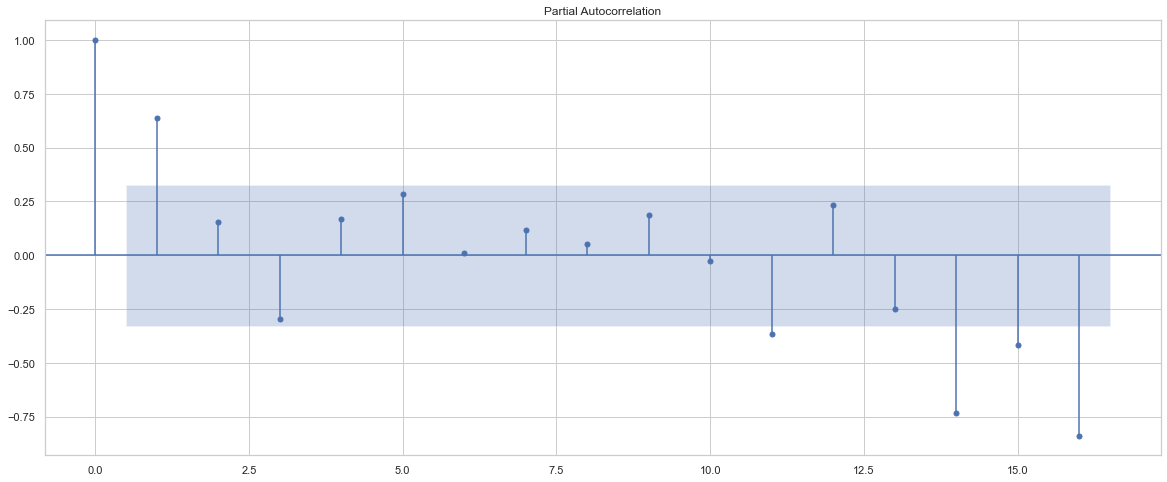

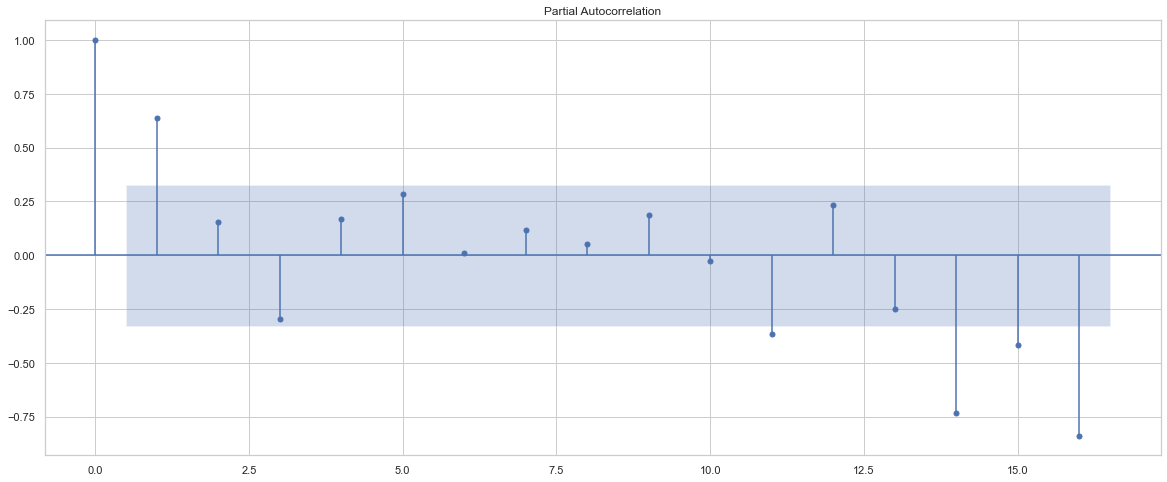

In [38]:
# check autocorrelation


plot_pacf(hist_dfGRum)



In [39]:
# stats to analize the stationality


adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(hist_dfGRum.Vol_9LC.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


ADF test statistic: -2.7273790084059586
ADF p-values: 0.06941914676221339
ADF number of lags used: 0
ADF number of observations: 35
ADF critical values: {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}
ADF best information criterion: 338.0607839526979


In [40]:
#hist_dfGRum_diff = hist_dfGRum.diff().dropna()

#lets do temporal df to aply  diferenciation maybe try to get it stationaly

tdf=hist_dfGRum[['Vol_9LC']]


In [41]:
tdf['first_dif']=tdf['Vol_9LC']-tdf['Vol_9LC'].shift(1)

In [42]:
tdf['seasonal_dif']=tdf['Vol_9LC']-tdf['Vol_9LC'].shift(12)

In [43]:
tdf

,Vol_9LC,first_dif,seasonal_dif
Month,,,
2019-04-01,165.266668,NaN,NaN
2019-05-01,176.966667,11.699999,NaN
2019-06-01,243.366666,66.399999,NaN
2019-07-01,207.199999,-36.166667,NaN
2019-08-01,200.466439,-6.733560,NaN
2019-09-01,142.555631,-57.910808,NaN
2019-10-01,561.977931,419.422300,NaN
2019-11-01,356.088971,-205.888960,NaN
2019-12-01,487.277701,131.188730,NaN


In [44]:
#adfuller test to the first diference


adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(tdf['first_dif'].dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -5.1675380861390305
ADF p-values: 1.0237749150123557e-05
ADF number of lags used: 3
ADF number of observations: 31
ADF critical values: {'1%': -3.661428725118324, '5%': -2.960525341210433, '10%': -2.6193188033298647}
ADF best information criterion: 328.4403549708416


<AxesSubplot:xlabel='Month'>

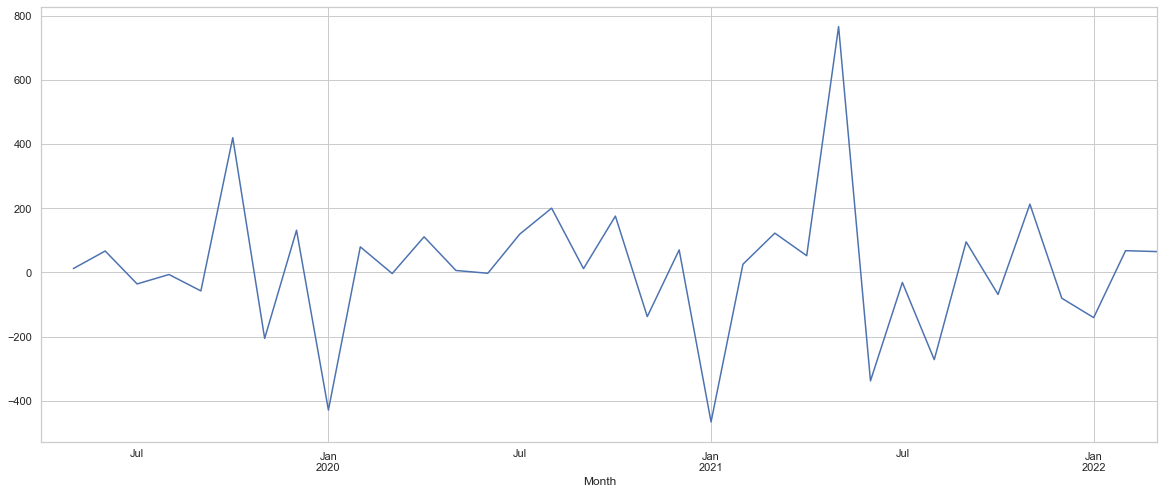

In [45]:
tdf['first_dif'].plot()

In [46]:
#adfuller test to the seasonal diference


adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(tdf['seasonal_dif'].dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -3.9946351729061607
ADF p-values: 0.0014388650591884735
ADF number of lags used: 2
ADF number of observations: 21
ADF critical values: {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}
ADF best information criterion: 196.13822846367816


<AxesSubplot:xlabel='Month'>

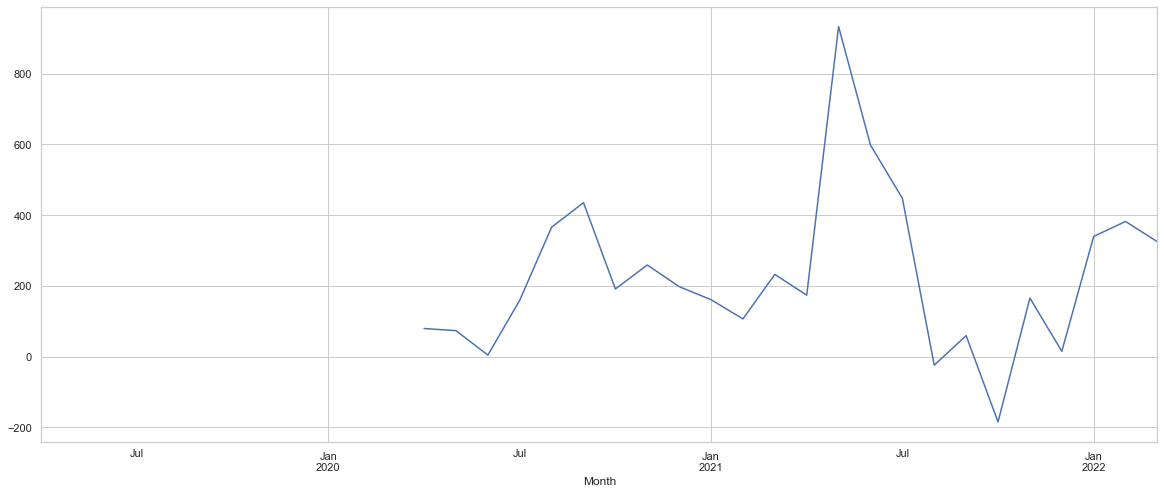

In [47]:
tdf['seasonal_dif'].plot()

In [49]:
hist_dfGRum


,Vol_9LC
Month,
2019-04-01,165.266668
2019-05-01,176.966667
2019-06-01,243.366666
2019-07-01,207.199999
2019-08-01,200.466439
2019-09-01,142.555631
2019-10-01,561.977931
2019-11-01,356.088971
2019-12-01,487.277701


 - the data is non-stationary but the p-value is close to be stationary...

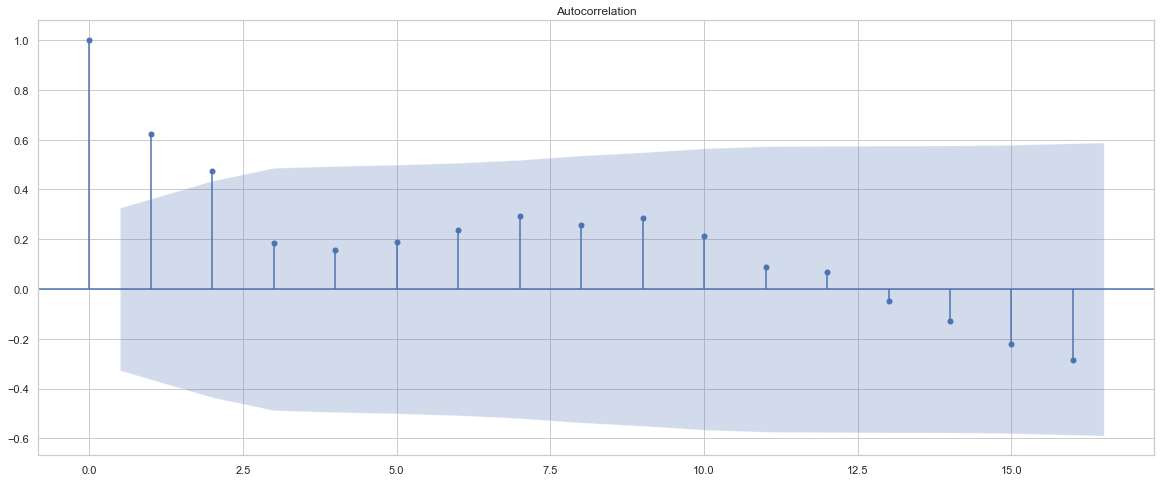

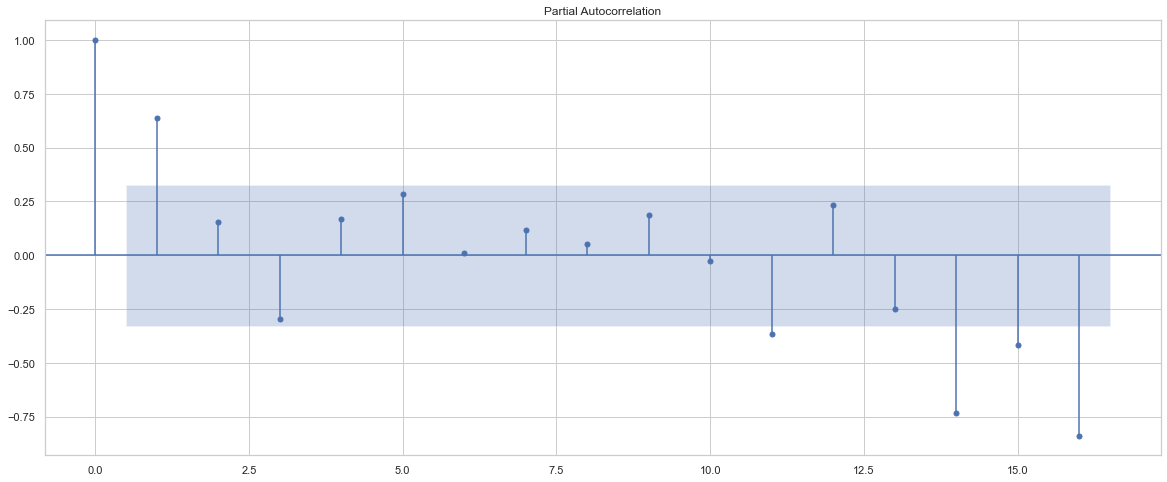

In [50]:
plot_acf(hist_dfGRum['Vol_9LC']);
plot_pacf(hist_dfGRum['Vol_9LC']);

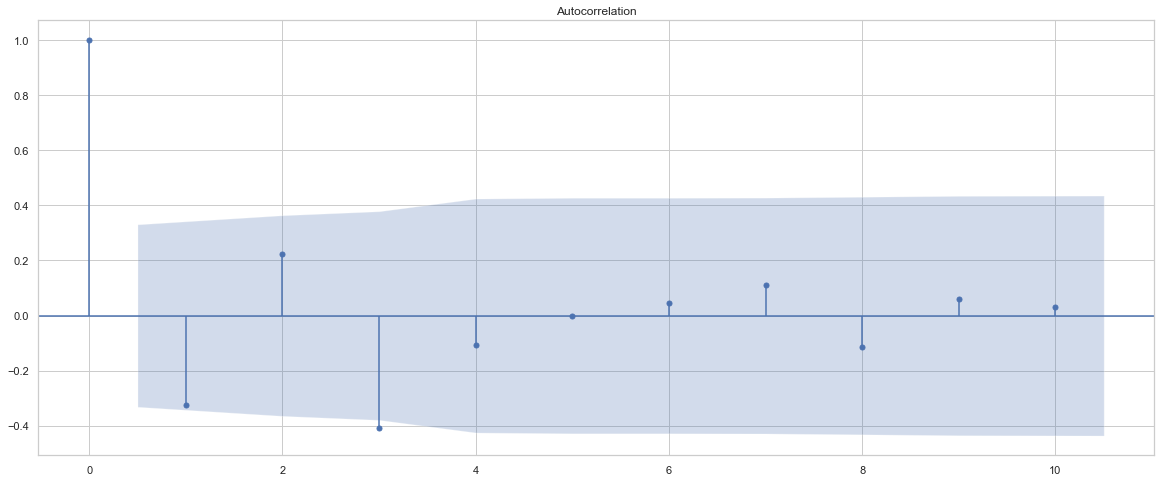

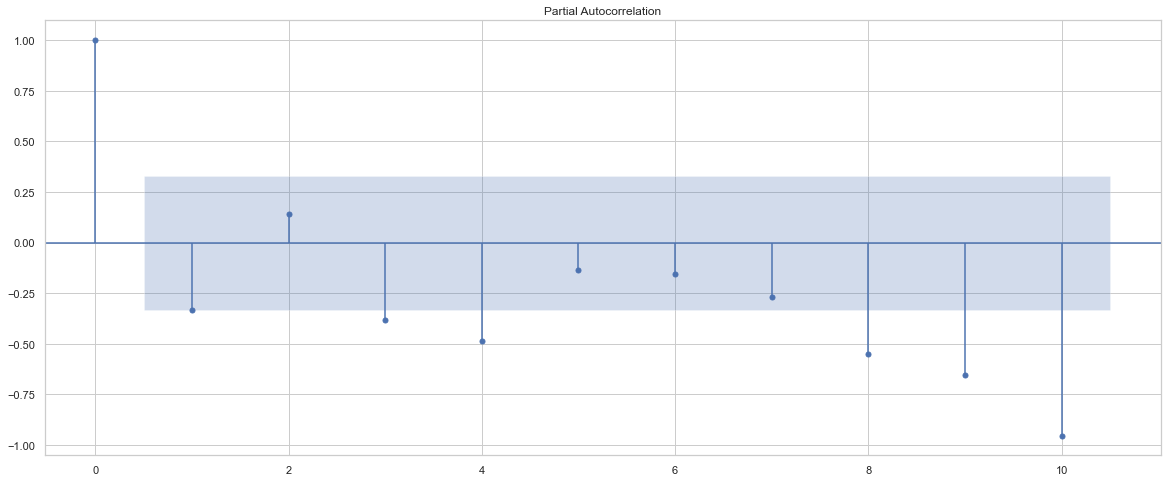

In [51]:
# autocorrelation and partial ac of the first diference

plot_acf(tdf['first_dif'].iloc[1:], lags=10);
plot_pacf(tdf['first_dif'].iloc[1:], lags=10);

### With this plots we can extract

- for the normal hist_dfGRum we can get that q=[0,1,2](from ACf) and p=[1,14,16](from PACf)
- for the dif hist_dfGRum_diff we can get that q=[0,3](from ACf) and p=[11,12](from PACf) but is prob wrong

## ARIMA model

In [52]:
# lets fit 
#good candidates
#14, 2 ,1
#1 ,1 ,2/1
#0, 1, 1/2

arima = ARIMA(hist_dfGRum['Vol_9LC'], order=(0,1,2))
predictions1 = arima.fit().predict()
model1=arima.fit()

C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


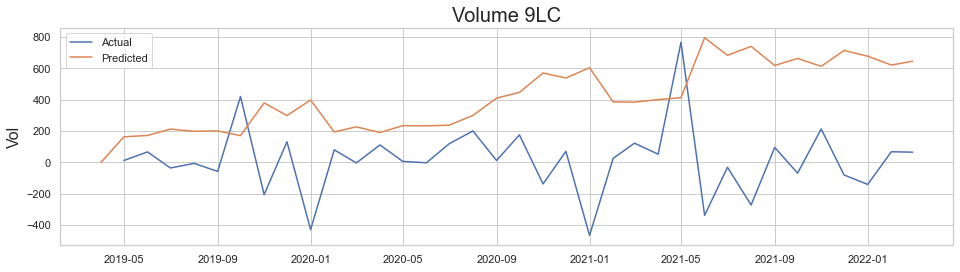

In [53]:
# lets plot???

plt.figure(figsize=(16,4))
plt.plot(hist_dfGRum.diff(), label="Actual")
plt.plot(predictions1, label="Predicted")
plt.title('Volume 9LC', fontsize=20)
plt.ylabel('Vol', fontsize=16)
plt.legend()


In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Vol_9LC   No. Observations:                   36
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -235.818
Date:                Sun, 05 Jun 2022   AIC                            477.635
Time:                        14:20:41   BIC                            482.301
Sample:                    04-01-2019   HQIC                           479.246
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5006      0.286     -1.750      0.080      -1.061       0.060
ma.L2         -0.1783      0.299     -0.596      0.551      -0.765       0.409
sigma2      4.105e+04   5867.640      6.996      0.000    2.95e+04    5.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.25
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.18   Skew:                             1.12
Prob(H) (two-sided):                  0.19   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX model

In [55]:
# lets shoot to the moon an try sarimax

#from statsmodels.tsa.statespace.sarimax import SARIMAX

s_mod = SARIMAX(hist_dfGRum['Vol_9LC'], 
                order=(1,2,3), 
                seasonal_order=(1,1,3,12))
predictions2 = s_mod.fit().predict()

model2 = s_mod.fit()

C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate st

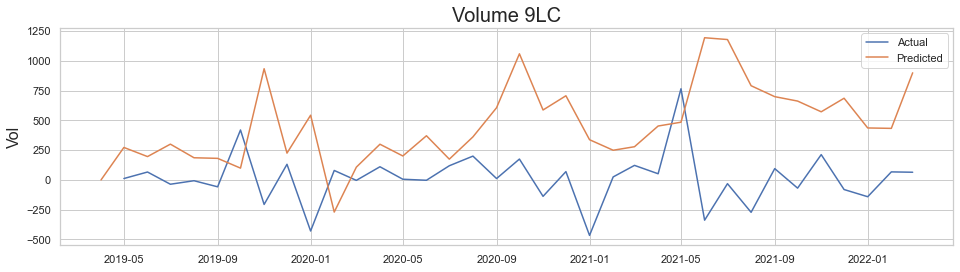

In [56]:
# lets plot???

plt.figure(figsize=(16,4))
plt.plot(hist_dfGRum.diff(), label="Actual")
plt.plot(predictions2, label="Predicted")
plt.title('Volume 9LC', fontsize=20)
plt.ylabel('Vol', fontsize=16)
plt.legend()


In [57]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Vol_9LC   No. Observations:                   36
Model:             SARIMAX(1, 2, 3)x(1, 1, 3, 12)   Log Likelihood                -151.415
Date:                            Sun, 05 Jun 2022   AIC                            320.830
Time:                                    14:20:52   BIC                            330.649
Sample:                                04-01-2019   HQIC                           323.143
                                     - 03-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9537      1.865     -0.511      0.609      -4.610       2.702
ma.L1         -0.1171     46.216     -0.003      0.998     -90.699      90.464
ma.L2         -0.7431     40.208     -0.018      0.985     -79.549      78.063
ma.L3         -0.1374      7.098     -0.019      0.985     -14.050      13.775
ar.S.L12       0.3949    247.934      0.002      0.999    -485.547     486.337
ma.S.L12      -0.7984    310.243     -0.003      0.998    -608.864     607.267
ma.S.L24      -0.4056    138.273     -0.003      0.998    -271.417     270.605
ma.S.L36       0.4727    167.816      0.003      0.998    -328.441     329.387
sigma2      3.288e+04      0.162   2.03e+05      0.000    3.29e+04    3.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 7.52
Prob(Q):                              0.84   Prob(JB):                         0.02
Heteroskedasticity (H):               1.06   Skew:                             0.99
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+23. Standard errors may be unstable.
"""

In [58]:
# lets shoot to the moon an try sarimax

#from statsmodels.tsa.statespace.sarimax import SARIMAX

#parametros sugeridos por carlos

s_mod = SARIMAX(hist_dfGRum['Vol_9LC'], 
                order=(1,0,0), 
                seasonal_order=(1,0,2,12))
predictions3 = s_mod.fit().predict()

C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Krop\anaconda3\envs\ClassPau\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

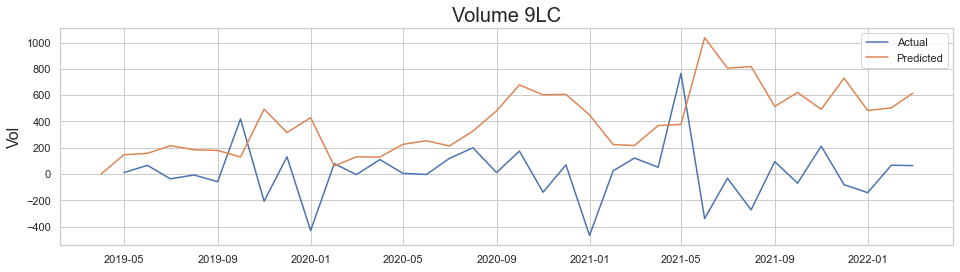

In [59]:
# lets plot???

plt.figure(figsize=(16,4))
plt.plot(hist_dfGRum.diff(), label="Actual")
plt.plot(predictions3, label="Predicted")
plt.title('Volume 9LC', fontsize=20)
plt.ylabel('Vol', fontsize=16)
plt.legend()

## inputing external datas

In [ ]:
lst=[]
for i in range(36):
    lst.append(0)

covdf=pd.DataFrame([lst])

In [ ]:
covdf

In [ ]:
# lets shoot to the moon an try sarimax

#from statsmodels.tsa.statespace.sarimax import SARIMAX

#parametros sugeridos por carlos

s_mod = SARIMAX(hist_dfGRum['Vol_9LC'], 
                order=(1,0,0), 
                seasonal_order=(1,0,2,12),
                exog=)
predictions3 = s_mod.fit().predict()

In [ ]:
# lets plot???

plt.figure(figsize=(16,4))
plt.plot(hist_dfGRum.diff(), label="Actual")
plt.plot(predictions3, label="Predicted")
plt.title('Volume 9LC', fontsize=20)
plt.ylabel('Vol', fontsize=16)
plt.legend()

## AutoARIMA model

our data is not stationary. We apply log transformation before we start modeling

In [98]:
tdf2=hist_dfGRum[['Vol_9LC']]

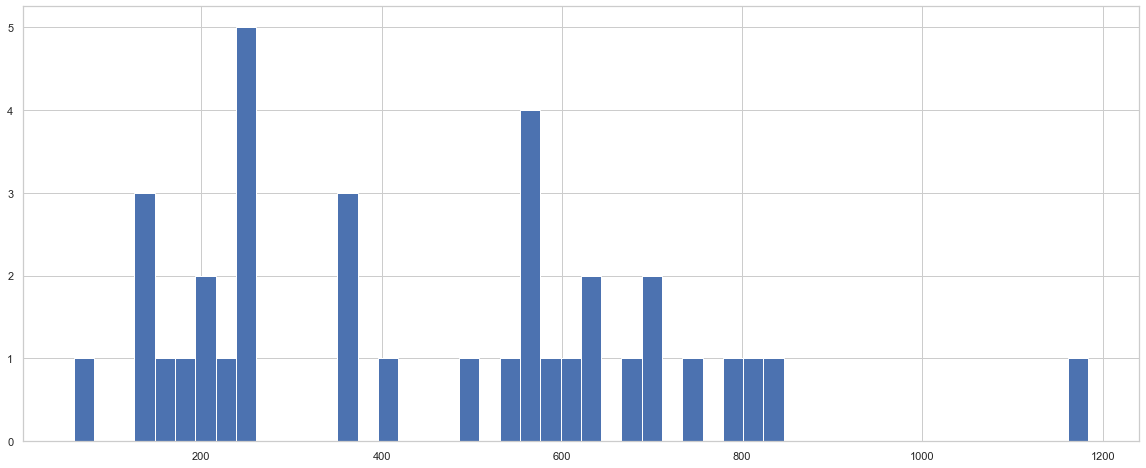

In [99]:
# check for normality
plt.hist(tdf2['Vol_9LC'], bins=50);


In [100]:
# apply a log transformation to normalize the data
tdf2['Vol_9LC_log'] = np.log(tdf2['Vol_9LC'])

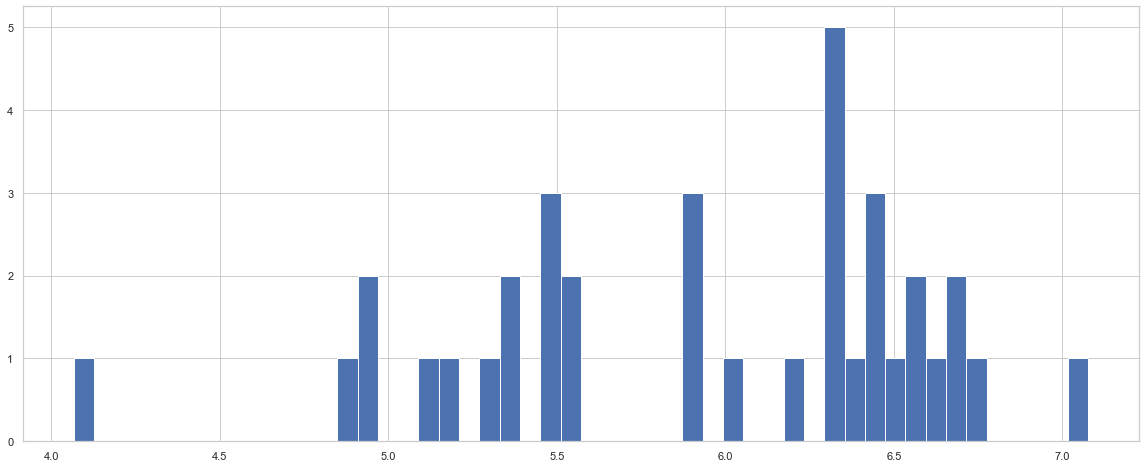

In [101]:
# check for normality
plt.hist(tdf2['Vol_9LC_log'], bins=50);

In [ ]:
hist_dfGRum

In [102]:
#we still want univariable
tdf2.drop('Vol_9LC', axis = 1, inplace = True) 


In [103]:
from pmdarima.arima import auto_arima

In [104]:
model = auto_arima(tdf2, start_p=0, start_q=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -26.935
Date:                Fri, 03 Jun 2022   AIC                             59.870
Time:                        16:29:25   BIC                             64.536
Sample:                             0   HQIC                            61.481
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8106      0.263     -3.081      0.002      -1.326      -0.295
ma.L1          0.5539      0.489      1.133      0.257      -0.404       1.512
sigma2         0.2710      0.051      5.267      0.000       0.170       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.34
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -1.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.plot_diagnostics()

In [ ]:
hist_dfGRum.info()

In [ ]:
#use the model to predict

prediction, confint = model.predict(n_periods=6, return_conf_int=True)

prediction


In [ ]:
#put prediction on a df
cf= pd.DataFrame(confint)

In [ ]:
cf

In [ ]:
prediction_series = pd.Series(prediction,index=['2021-10-01 00:00:00', '2021-11-01 00:00:00' ,'2021-12-01 00:00:00',
                                                '2022-01-01 00:00:00','2022-02-01 00:00:00','2022-03-01 00:00:00'])

In [ ]:
prediction_series

In [ ]:
hist_dfGRum

In [ ]:
pred_df=prediction_series.to_frame()

In [ ]:
pred_df

In [ ]:
hist_dfGRum=pd.concat([hist_dfGRum, pred_df], axis=1)

In [ ]:
hist_dfGRum